In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportions_chisquare


In [2]:
count = 28
nobs = 94
value = .16
stat, pval = proportions_ztest(count, nobs, value)
print(stat, pval)

2.9229268377264077 0.0034675798365736213


In [3]:
# The P-value is significant 

In [5]:
df2 = pd.read_csv(r"C:\Users\minel\OneDrive\Documents\Entity Coursework\DSO105C (Oct 3 - Oct 23)\Final Project\antiseptics.csv")
df2.rename(columns={'Antiseptic Type ': "AS", "Number of applications": "Count"}, inplace=True)

In [6]:
df2.head()

,Clinic,AS,Count
0,1,A,22
1,1,B,71
2,1,C,8
3,1,D,49
4,2,A,38


In [7]:
df2_pivot = pd.pivot_table(df2,index='AS',columns='Clinic',values="Count")
df2_pivot

Clinic,1,2,3
AS,,,
A,22,38,84
B,71,112,298
C,8,14,37
D,49,69,182


In [8]:
stats.chi2_contingency(df2_pivot)

(1.225920250023835,
 0.9755850789571424,
 6,
 array([[ 21.95121951,  34.09756098,  87.95121951],
        [ 73.32317073, 113.8953252 , 293.78150407],
        [  8.99390244,  13.97052846,  36.03556911],
        [ 45.73170732,  71.03658537, 183.23170732]]))

# Scenario 3

In [10]:
df3 = pd.read_csv(r"C:\Users\minel\OneDrive\Documents\Entity Coursework\DSO105C (Oct 3 - Oct 23)\Final Project\savings.csv")
df3.head()

,Group A,Group B,Group C,Group D
0,21383.06,17077.54,13636.38,14582.73
1,19729.92,17258.06,5156.36,12880.28
2,24071.53,20652.91,4446.92,16412.72
3,19056.28,20845.06,4892.59,14020.00
4,19147.18,22296.64,14099.38,16467.70


In [11]:
df3_expanded=pd.melt(df3,var_name='Group', value_name='$')

In [12]:
df3_expanded

,Group,$
0,Group A,21383.06
1,Group A,19729.92
2,Group A,24071.53
3,Group A,19056.28
4,Group A,19147.18
...,...,...
227,Group D,12180.86
228,Group D,12972.11
229,Group D,12068.83
230,Group D,16064.42


In [13]:
df3_expanded = df3_expanded.replace(df3.columns, [0,1,2,3])
df3_expanded.head()

,Group,$
0,0,21383.06
1,0,19729.92
2,0,24071.53
3,0,19056.28
4,0,19147.18


C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

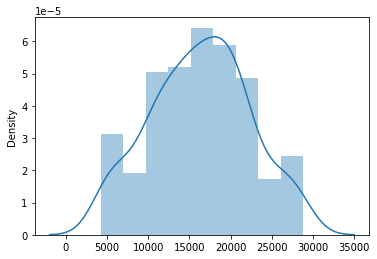

In [14]:
sns.distplot(df3.values[~np.isnan(df3.values)])

In [19]:
scipy.stats.bartlett(df3_expanded['Group'], df3_expanded['$'])

BartlettResult(statistic=3639.1753663764925, pvalue=0.0)

In [20]:
scipy.stats.fligner(df3_expanded['Group'], df3_expanded['$'])

FlignerResult(statistic=292.8661128532466, pvalue=1.1805018303420083e-65)

In [21]:
stats.f_oneway(df3_expanded['Group'][df3_expanded['$']=='Group_A'],
                    df3_expanded['Group'][df3_expanded['$']=='Group_B'],
                    df3_expanded['Group'][df3_expanded['$']=='Group_C'],df3_expanded['Group'][df3_expanded['$']=='Group_D'])

C:\Python3\lib\site-packages\scipy\stats\_stats_py.py:3630: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


F_onewayResult(statistic=nan, pvalue=nan)

In [23]:
postHoc = MultiComparison(df3_expanded['Group'], df3_expanded['$'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
 4225.66  4242.14      0.0    1.0 -5.3107 5.3107  False
 4225.66  4446.92      0.0    1.0 -5.3107 5.3107  False
 4225.66  4579.16      0.0    1.0 -5.3107 5.3107  False
 4225.66  4710.57      0.0    1.0 -5.3107 5.3107  False
 4225.66  4763.15      0.0    1.0 -5.3107 5.3107  False
 4225.66  4892.59      0.0    1.0 -5.3107 5.3107  False
 4225.66  5156.36      0.0    1.0 -5.3107 5.3107  False
 4225.66  5365.55      0.0    1.0 -5.3107 5.3107  False
 4225.66  5405.18      0.0    1.0 -5.3107 5.3107  False
 4225.66  5550.52      0.0    1.0 -5.3107 5.3107  False
 4225.66  5882.23      0.0    1.0 -5.3107 5.3107  False
 4225.66  5970.47      0.0    1.0 -5.3107 5.3107  False
 4225.66  6181.83      0.0    1.0 -5.3107 5.3107  False
 4225.66  6327.76      0.0    1.0 -5.3107 5.3107  False
 4225.66  6571.26      0.0    1.0 -5.3107 5.3107

In [26]:
df3_expanded.groupby('Group').mean()

,$
Group,
0,23401.849216
1,18566.307660
2,9227.456727
3,15017.776379


# Scenario 4

In [29]:
count = np.array([374, 129])
nobs = np.array([171, 74])
stat, pval = proportions_ztest(count, nobs)
print(stat, pval)

nan nan
